In [11]:
import os
import json
import glob
import numpy as np

import xarray as xr

import matplotlib.pyplot as plt

In [12]:
file_list = glob.glob(os.path.join('..', 'point', '*.json'))
file_list = sorted(file_list)
file_length = len(file_list)
print(f'Number of files: {file_length}')

Number of files: 44


In [13]:
nn = 1

file_pos = file_list[nn]
pos_la = file_pos.split('/')[-1].split('_')[1]
pos_lo = file_pos.split('/')[-1].split('_')[2]
print(f'LAT pos: {pos_la}, LON pos: {pos_lo}')

with open(file_list[nn], 'r') as f:
    data = json.load(f)

LAT pos: 11, LON pos: 160


In [21]:
data

{'NYs': '[34. 44. 39.]',
 'CYs': '[10.10840706 13.2324376   9.32571489]',
 'WYs': '[0.96215208 1.3095653  1.07248655]',
 'NYd': '[41. 53. 47.]',
 'CYd': '[ 7.6640825  10.31854683  7.1421808 ]',
 'WYd': '[0.81234381 1.03012021 0.88564648]',
 'Tr': '[  5  10  20  50 100 200]',
 'mev_d': '[ 54.41031926  63.03628551  71.62714956  83.27719114  92.43558064\n 101.9424252 ]',
 'mev_s': '[49.22684766 56.01072897 62.77194263 71.95276375 79.14886835 86.55571521]',
 'YEARS': '[2020. 2021. 2022.]',
 'gam_d': '0.98063993',
 'gam_s': '0.9816373',
 'beta': 0.8353947115489901,
 'Nd': 45.0,
 'Cd': 8.48147658138194,
 'Wd': 0.9125752592436361,
 'Ns': 38,
 'Cs': 11.035632243194371,
 'Ws': 1.1146145355169113,
 'eps_s': 139.4372440507242,
 'alp_s': 1.000179280997047,
 'eps_d': 103.45736162005791,
 'alp_d': 0.7828898894227997,
 'corr_down_success': True,
 'corr_down_funval': 0.007483266860485745,
 'w_down_funval': 4.666134145736578e-11,
 'thresh': 1.0,
 'clat': '37.074997',
 'clon': '14.524994'}

In [15]:
mev_d_array = np.fromstring(data['mev_d'].strip('[]'), sep=' ')
mev_s_array = np.fromstring(data['mev_s'].strip('[]'), sep=' ')
Tr = np.fromstring(data['Tr'].strip('[]'), sep=' ')
beta = data['beta']

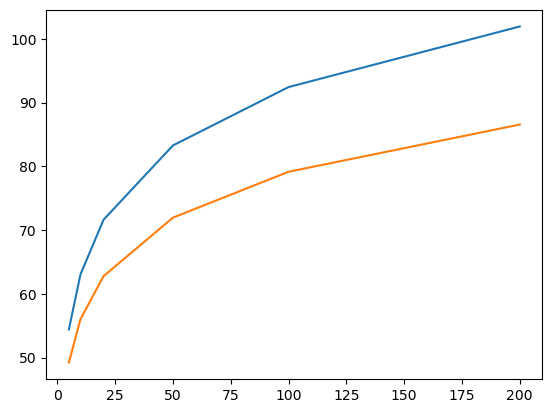

In [16]:
plt.plot(Tr, mev_d_array)
plt.plot(Tr, mev_s_array)

## LOAD CHIRPS

In [17]:
SAT = xr.open_dataset('/media/arturo/T9/Data/Italy/Satellite/CHIRPS/1dy/CHIRPS_Italy_1dy_1981_01_01_2024_06_30.nc')
lat = SAT.lat.values
lon = SAT.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)

lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

PRE_data = SAT.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))
print(np.shape(PRE_data.PRE.values))

del SAT

(15887, 240, 260)


In [18]:
BETA_2d = np.zeros([len(lat),len(lon)])
for nn in range(file_length):
    with open(file_list[nn], 'r') as f:
        tmp = json.load(f)
    beta_ = tmp['beta']

    lat_pos = np.where(lat==float(tmp['clat']))[0][0]
    lon_pos = np.where(lon==float(tmp['clon']))[0][0]

    BETA_2d[lat_pos, lon_pos] = beta_

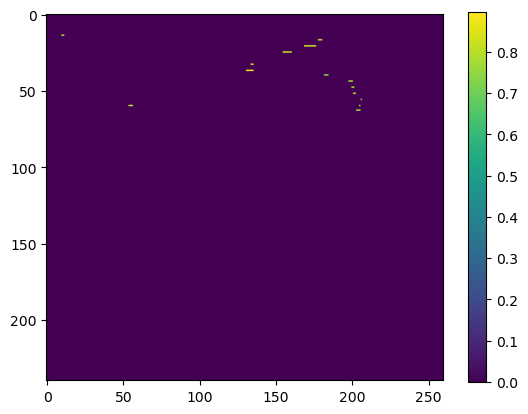

In [19]:
plt.imshow(BETA_2d)
plt.colorbar()

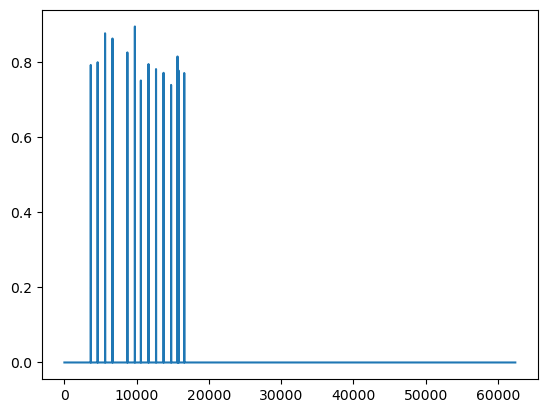

In [20]:
plt.plot(BETA_2d.flatten())